In [1]:
#extreme values are outliers

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [3]:
#five point summary
#min, 25th, 50th, 75th, 100th 

np.quantile(salary, [0, 0.25, .50, .75, .1])

array([11.  , 59.  , 71.  , 90.75, 45.3 ])

In [7]:
df=pd.DataFrame(salary,columns = ['salary'])

In [9]:
df

,salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [8]:
df.describe()

,salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


Text(0.5, 1.0, 'Box plot')

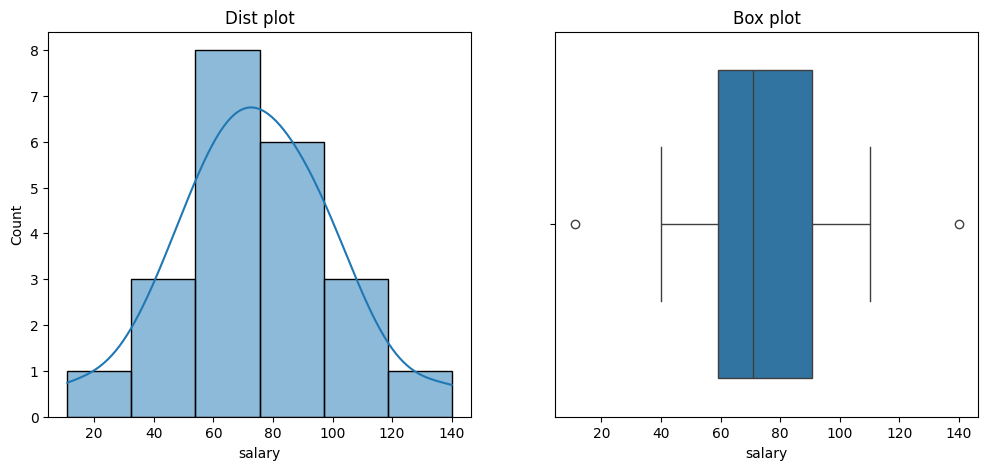

In [11]:
#To check outlier >> distplot, boxplot

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary'], kde=True)
plt.title("Dist plot")

plt.subplot(1,2,2)
sns.boxplot(data =df, x='salary')
plt.title("Box plot")

In [28]:
#there are three types of removing outlier
#1.droping the outlier
#2.replace with mean/median
#3.capping the outlier

In [13]:
#droping the outlier
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)

IQR = Q3-Q1
lower_fence = Q1-1.5 *IQR
upper_fence = Q3+1.5 *IQR


In [14]:
lower_fence 

11.375

In [15]:
upper_fence

138.375

In [21]:
df_filtered=df[(df.salary >= lower_fence) & (df.salary <= upper_fence)]

In [23]:
df_filtered.shape

(20, 1)

In [25]:
df.shape

(22, 1)

Text(0.5, 1.0, 'Box plot')

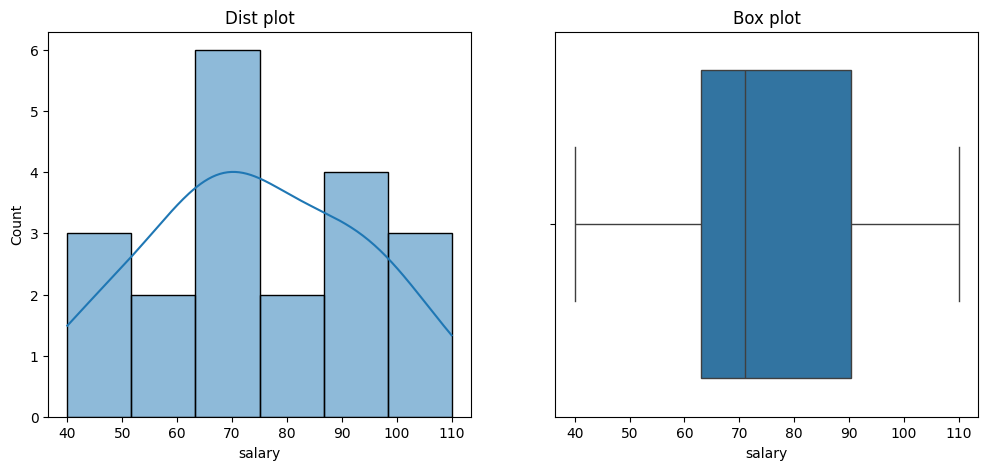

In [26]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['salary'], kde=True)
plt.title("Dist plot")

plt.subplot(1,2,2)
sns.boxplot(data =df_filtered, x='salary')
plt.title("Box plot")

In [35]:
# imputation with mean and media
df['Salary_imputed_mean'] = np.where((df.salary >= upper_fence) | (df.salary <= lower_fence), df['salary'].mean(), df['salary'])

In [36]:
df

,salary,Salary_imputed_mean
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


Text(0.5, 1.0, 'Box plot')

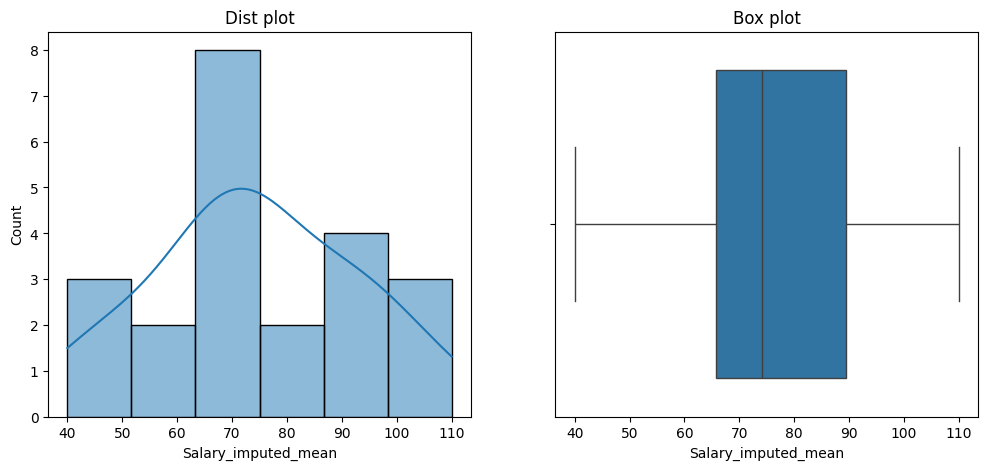

In [43]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_imputed_mean'], kde=True)
plt.title("Dist plot")

plt.subplot(1,2,2)
sns.boxplot(data =df, x='Salary_imputed_mean')
plt.title("Box plot")

In [38]:
df['Salary_imputed_median'] = np.where((df.salary >= upper_fence) | (df.salary <= lower_fence), df['salary'].median(), df['salary'])

In [39]:
df

,salary,Salary_imputed_mean,Salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


Text(0.5, 1.0, 'Box plot')

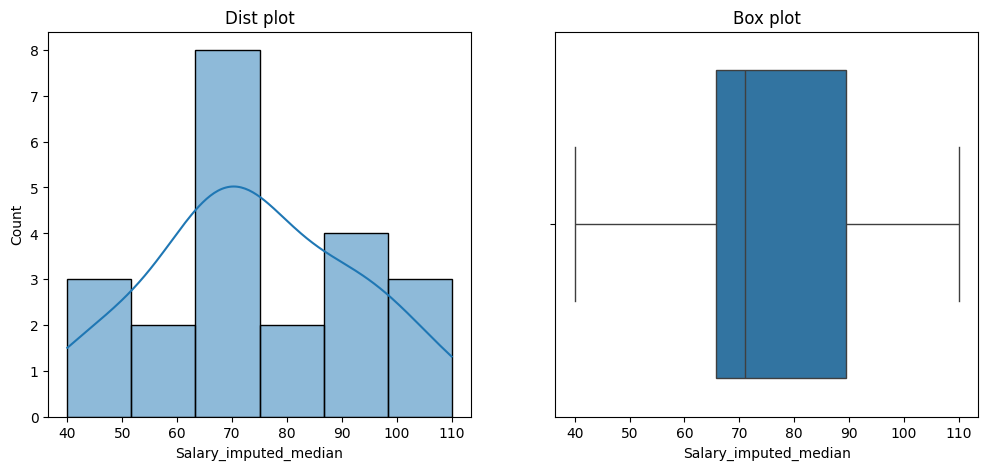

In [44]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_imputed_median'], kde=True)
plt.title("Dist plot")

plt.subplot(1,2,2)
sns.boxplot(data =df, x='Salary_imputed_median')
plt.title("Box plot")

In [46]:
#capping >> replacing with the nearest value with is not outlier
df

,salary,Salary_imputed_mean,Salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


In [47]:
lower_cap = df['salary'].quantile(0.05) #lower cap as 5th percentile
upper_cap = df['salary'].quantile(0.95) #upper cap 95th percentile

In [49]:
lower_cap

40.25

In [50]:
upper_cap

109.55

In [53]:
#replace outliers with the cap

df['salary_capped'] = np.where(df['salary'] < lower_cap, lower_cap,
        np.where(df['salary'] > upper_cap, upper_cap,
                df['salary']))

In [54]:
df

,salary,Salary_imputed_mean,Salary_imputed_median,Salary_capped,salary_capped
0,11,74.318182,71.0,40.25,40.25
1,40,40.000000,40.0,40.25,40.25
2,45,45.000000,45.0,45.00,45.00
3,68,68.000000,68.0,68.00,68.00
4,65,65.000000,65.0,65.00,65.00
5,68,68.000000,68.0,68.00,68.00
6,78,78.000000,78.0,78.00,78.00
7,90,90.000000,90.0,90.00,90.00
8,57,57.000000,57.0,57.00,57.00
9,74,74.000000,74.0,74.00,74.00


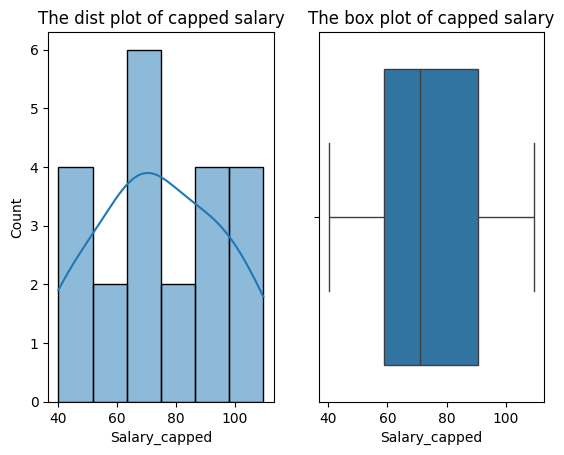

In [55]:
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_capped'], kde=True)
plt.title("The dist plot of capped salary")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Salary_capped')
plt.title("The box plot of capped salary")

plt.show()